In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from ForceRNN import FRNN

In [33]:
np.unique(np.diff(time_array).round(decimals=5))

array([0.1])

In [ ]:
## Train network to fit signal

frnn = FRNN(n_gen=10)
time_array = np.round(np.arange(start=0, stop=250, step=0.1), 6).round(decimals=5)
signal = (np.sin(time_array) / 4)
#           0.1 * np.cos(2.5 * time_array) +
#           0.05 * np.power(np.sin(time_array) + np.cos(time_array), 2))
frnn.forward(time_target=time_array, f_target=signal)


## Plot read-out & signal

plt.rcParams['figure.figsize'] = (15, 3)
plt.plot(frnn.time_array, frnn.z_forw.T, linewidth=3, label='FRNN read-out', alpha=0.8)
plt.plot(frnn.time_array, frnn.f_full, linewidth=3, label='Train signal', alpha=0.8)
plt.xlabel('Time (s)'); plt.ylabel('Output signal'); 
plt.title('Force RNN is trained to fit sinusoid', weight='bold'); plt.legend();
plt.xlim([0, 500])

FRNN initiated


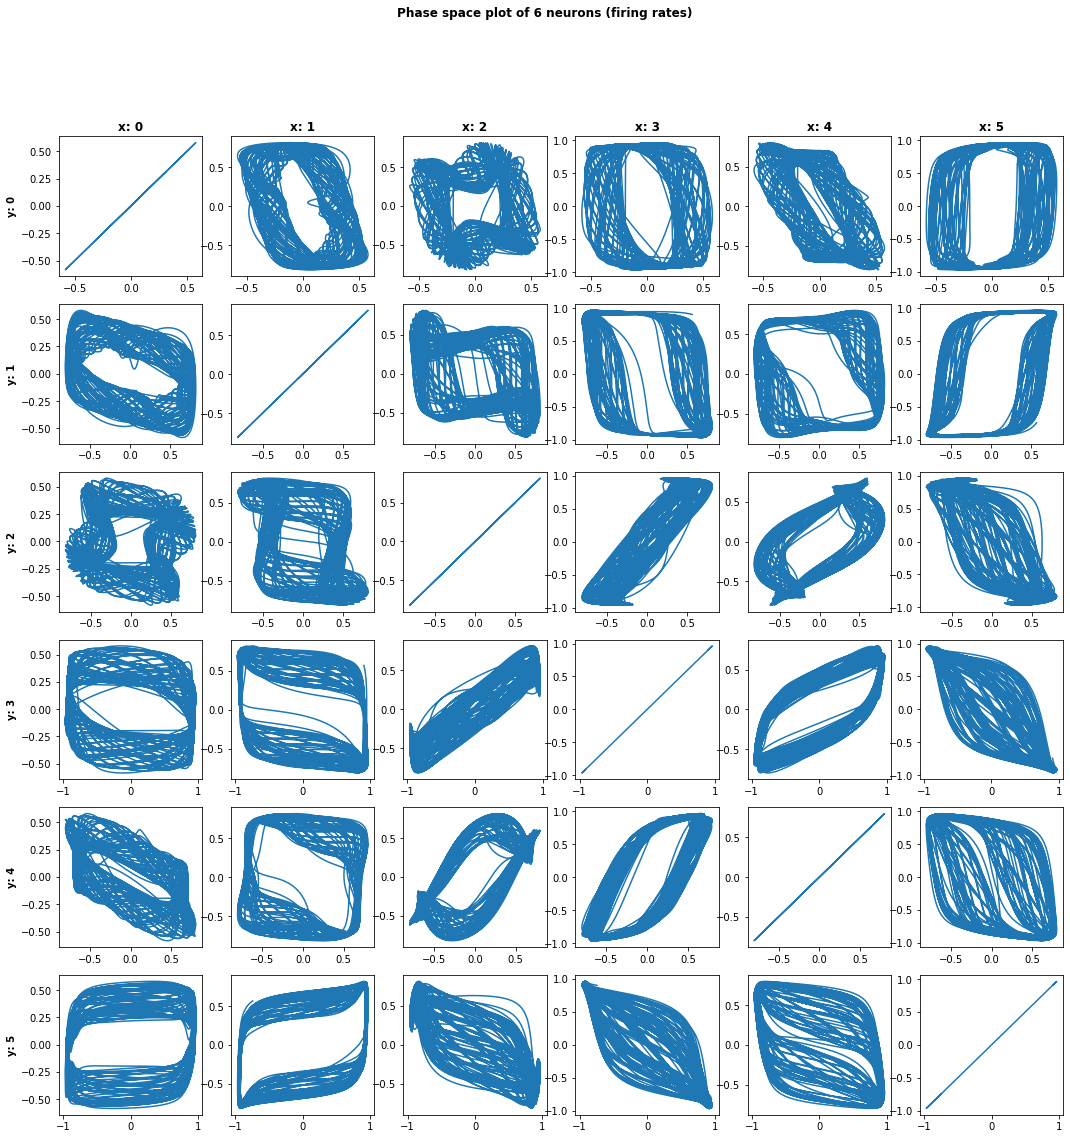

In [3]:
## Plot phase space grid of some neurons

plt.rcParams['figure.figsize'] = (18, 18)
for i_row in range(6):
    for i_col in range(6):
        plt.subplot(6, 6, 6 * i_row + i_col + 1)
        plt.plot(frnn.r_forw[i_row, 300:], frnn.r_forw[i_col, 300:])
        if i_row == 0:
            plt.title(f'x: {i_col}', weight='bold')
        if i_col == 0:
            plt.ylabel(f'y: {i_row}', weight='bold')
        
plt.suptitle('Phase space plot of 6 neurons (firing rates)', weight='bold');